In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

sys.path.append(os.path.dirname(os.path.abspath(os.getcwd())) + "/..")
if os.getcwd().endswith("Topic2"):
    os.chdir("..")
    print(f"Changed to {os.getcwd()}")

from codebase import(
    load_excel, 
    load_odin_as_ml_dataset, 
    plot_confusion_matrix, 
    make_ml_dataset, 
    run_binary_regression, 
    transport_modes, 
    trip_motives, 
    province_codes, 
    transport_mode_col, 
    IGNORE_RULES, 
    apply_ignore_rules,
    number_of_sub_trips_col,
    )

Changed to c:\Users\toell\Documents\GitHub\Design-of-AI-driven-business-operation


In [2]:
years = [2019, 2020, 2021, 2022, 2023]
dfs = []
for year in years:
    odin_excel_path = os.path.join(os.getcwd(), "data", "OdiN 2019-2023", f"OdiN {year}", f"ODiN{year}_Databestand.csv")
    if year in [2019, 2020]:
        odin_excel_path = odin_excel_path.replace("Databestand", "Databestand_v2.0")
    df = load_excel(odin_excel_path)
    df = apply_ignore_rules(df, IGNORE_RULES)   # <<–– new line

    dfs.append(df[df[number_of_sub_trips_col] == 1])  # Filter for single sub-trips

df_all = pd.concat(dfs, ignore_index=True)

Loaded file from CSV
Loaded file from CSV
Loaded file from CSV
Loaded file from CSV
Loaded file from CSV


In [4]:
df_all

,Variabele_naam_ODiN_2019,Variabele_label_ODiN_2019,Niveau \nP = persoon; \nV = verplaatsing;\nR = rit; \nW = weegfactor,Code_ODiN_2019,Code_label_ODiN_2019,Korte_omschrijving,OP,OPID,Steekproef,Mode,...,BerHalte,RdHalteA,RdHalteB,BerFam,RdFamA,RdFamB,BerSport,RdSportA,RdSportB,HerkLand
0,OP,Nieuwe persoon,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0,Geen nieuwe persoon,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,1,Nieuwe persoon,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OPID,Uniek id voor iedere OP,P,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,id,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786999,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.799999e+11,1.0,1.0,...,1.0,13.0,13.0,1.0,13.0,13.0,1.0,13.0,13.0,1.0
787000,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.799999e+11,1.0,1.0,...,1.0,13.0,13.0,1.0,13.0,13.0,1.0,13.0,13.0,1.0
787001,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.799999e+11,1.0,1.0,...,1.0,13.0,13.0,1.0,13.0,13.0,1.0,13.0,13.0,1.0
787002,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.799999e+11,1.0,1.0,...,1.0,13.0,13.0,1.0,13.0,13.0,1.0,13.0,13.0,1.0


In [ ]:
len(df), len(df["OPID"].unique())

In [ ]:
len(df_all) / df_all["VertPC"].unique().shape[0]

In [ ]:
# Create a histogram for the number of trips for each transport mode and translate to 
df[transport_mode_col].value_counts().plot(kind="bar", title="Number of trips per transport mode")

In [ ]:
for val, name in transport_modes.items():
    print(f"Number of {name}: ({len(df[df[transport_mode_col] == val])})")

In [ ]:
print(transport_modes)

In [ ]:
print(trip_motives)

In [ ]:
print(province_codes)

In [ ]:
df_all.columns

Common labels: [False  True]


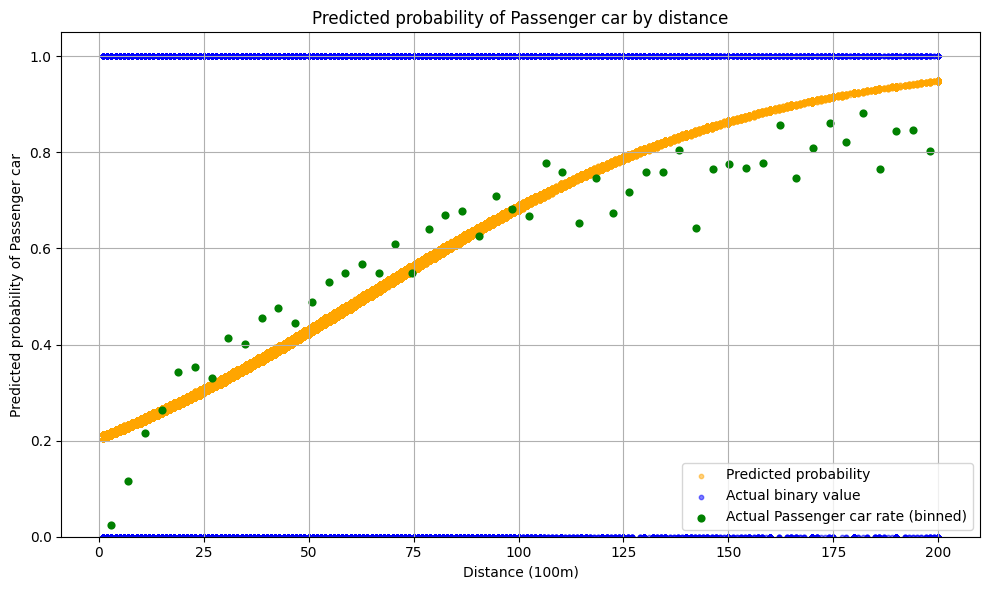

Common labels: [False  True]


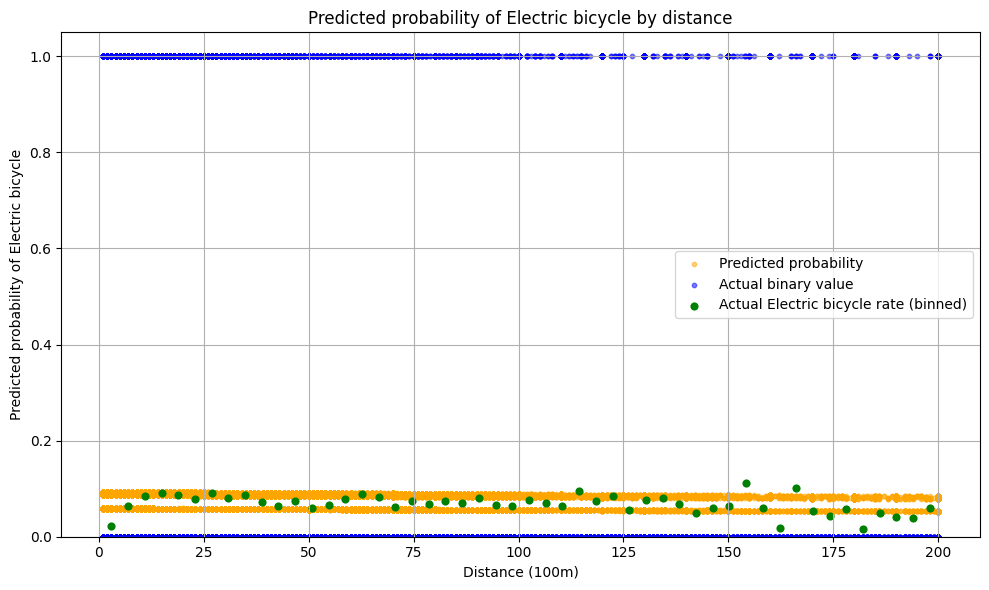

Common labels: [False  True]


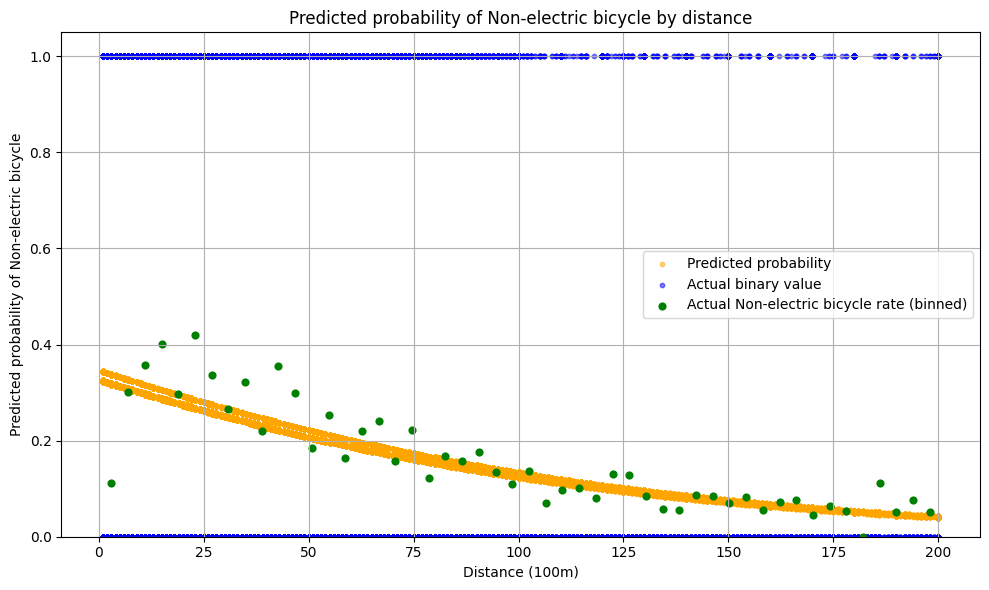

Common labels: [False  True]


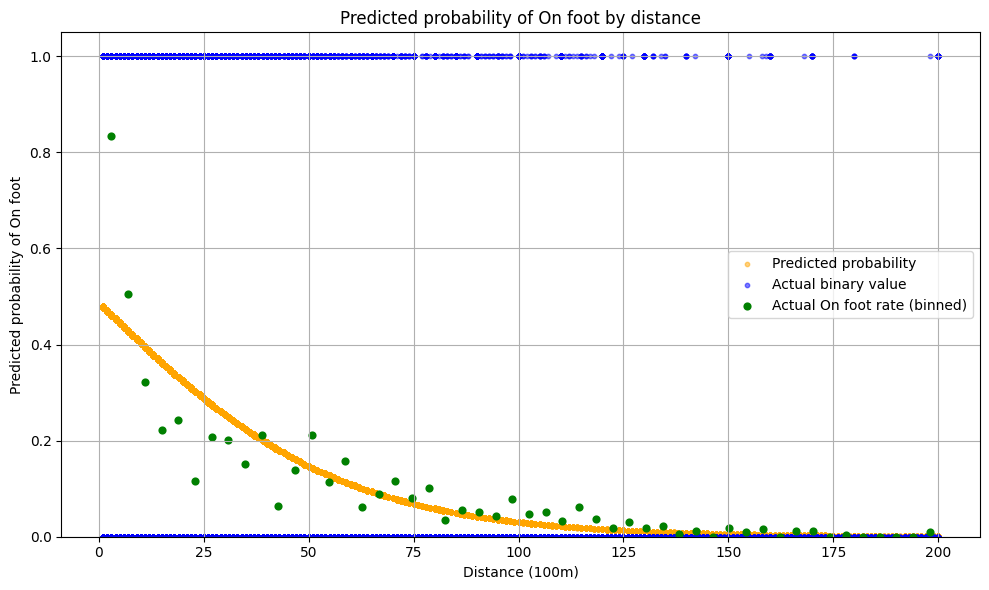

In [6]:
max_dist=200 # max distance in 100s of meters
motives=None 
vehicles_to_include = [1, 7, 8, 9, ]
for transport_mode in vehicles_to_include:
    run_binary_regression(
        df_all,
        test_size=0.2,
        transport_modes_predict=[transport_mode, ],
        motives=motives,
        max_dist=max_dist,
        savename=f"graphics/classification_results/binary_regression/{motives}/{transport_modes[transport_mode].replace(r'/', ' or ')}_{max_dist}",
    )

Common labels: [False  True]


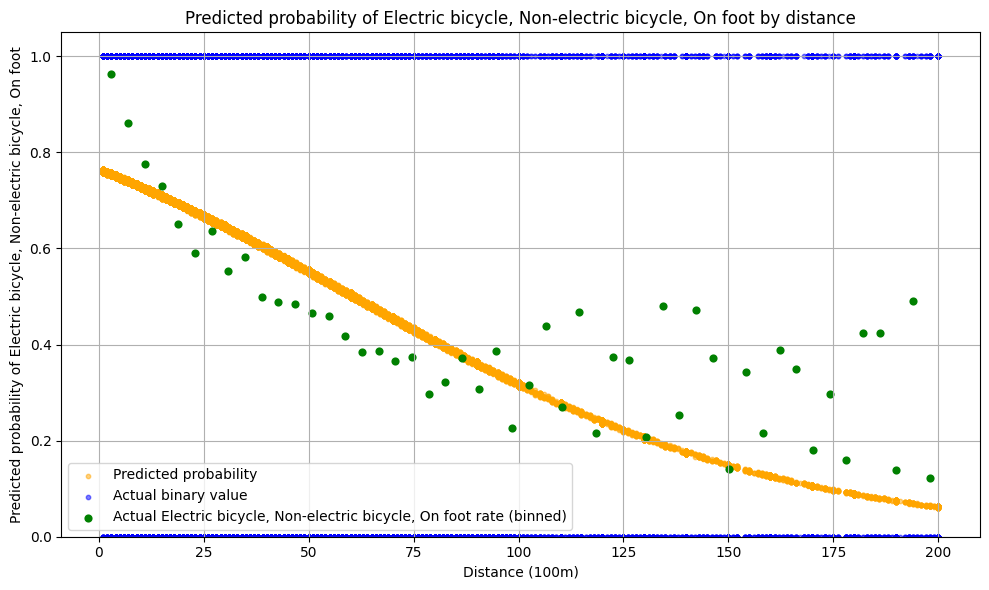

In [ ]:
combined_modes = [[7, 8, 9]]
for tm in combined_modes:
    transport_mode_str = ", ".join([transport_modes[tm_] for tm_ in tm])
    run_binary_regression(
        df_all,
        test_size=0.2,
        transport_modes_predict=tm,
        motives=motives,
        max_dist=max_dist,
        savename=f"graphics/classification_results/binary_regression/{motives}/{transport_mode_str.replace(r'/', ' or ')}_{max_dist}",
    )